<a href="https://colab.research.google.com/github/afrozmaria07/anomalyDetection-DBSCAN-PID-GAM-PCA/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rrcf

  Preparing metadata (setup.py) ... done
  Created wheel for rrcf: filename=rrcf-0.4.4-py3-none-any.whl size=10601 sha256=cbdb94a0f531ee55ddd112218faeb82139932cc2b9a8196d8586b6a57f242b8c
  Stored in directory: /root/.cache/pip/wheels/51/d4/43/6ac8270752946ee2223022ce0ed0d66c9455d000e1facb53a6
Successfully built rrcf


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install PyOD

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyOD: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=7ed8a40a9de940716211f3e7dc61f21270e291ebaaa90abf69f807642401dbe7
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built PyOD


In [ ]:
!pip install scipy

In [ ]:
import scipy.io

# Load the .mat file
mat = scipy.io.loadmat('/content/drive/MyDrive/Data Mining /Project/Data/wine.mat')

# Check the keys in the loaded .mat file
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [ ]:
# Accessing a variable called 'data' (assuming it exists in your .mat file)
data = mat['X']

# If it's a numpy array, you can explore it further
print(type(data))
print(data.shape)  # Check the dimensions of the array
print(data)        # Print the contents of the array

<class 'numpy.ndarray'>
(129, 13)
[[1.329e+01 1.970e+00 2.680e+00 ... 1.070e+00 2.840e+00 1.270e+03]
 [1.430e+01 1.920e+00 2.720e+00 ... 1.070e+00 2.650e+00 1.280e+03]
 [1.368e+01 1.830e+00 2.360e+00 ... 1.230e+00 2.870e+00 9.900e+02]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [ ]:
%cd /content/pidforest/code/

/content/pidforest/code


In [ ]:
!python run_classification_pyod.py



******thyroid trial 1*******



******kNN*******


******PCA*******

/content/pidforest/code/run_classification_pyod.py:62: RuntimeWarning: invalid value encountered in divide
  precision_all[j,1] = max(2*precision_lof*recall_lof/(precision_lof+recall_lof))
0.2979	
0.2437	


0.7511	
0.6729	




******mammography trial 1*******



******kNN*******


******PCA*******

/content/pidforest/code/run_classification_pyod.py:61: RuntimeWarning: invalid value encountered in divide
  precision_all[j,0] = max(2*precision_iso*recall_iso/(precision_iso+recall_iso))
/content/pidforest/code/run_classification_pyod.py:62: RuntimeWarning: invalid value encountered in divide
  precision_all[j,1] = max(2*precision_lof*recall_lof/(precision_lof+recall_lof))
0.2314	
0.2890	


0.8387	
0.8863	




******satimage-2 trial 1*******



******kNN*******


******PCA*******

0.4091	
0.8615	


0.9364	
0.9772	




******vowels trial 1*******



******kNN*******


******PCA*******

/content/pidforest/code/run_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***DBSCAN***

In [ ]:
!pip install dbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.1 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/Data Mining /Project/M/dbscan-master/dbscan-master

/content/drive/MyDrive/Data Mining /Project/M/dbscan-master/dbscan-master


In [ ]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

In [ ]:
from dbscan.dbscan import dbscan, test_dbscan, NOISE

In [ ]:
#version1

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat

UNCLASSIFIED = False
NOISE = None

def _dist(p,q):
	return math.sqrt(np.power(p-q,2).sum())

def _eps_neighborhood(p,q,eps):
	return _dist(p,q) < eps

def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for i in range(0, n_points):
        if _eps_neighborhood(m[:,point_id], m[:,i], eps):
            seeds.append(i)
    return seeds

def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    seeds = _region_query(m, point_id, eps)
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id

        while len(seeds) > 0:
            current_point = seeds[0]
            results = _region_query(m, current_point, eps)
            if len(results) >= min_points:
                for i in range(0, len(results)):
                    result_point = results[i]
                    if classifications[result_point] == UNCLASSIFIED or \
                       classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True

def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    for point_id in range(0, n_points):
        point = m[:,point_id]
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id = cluster_id + 1
    return classifications

def plot_clusters(m, classifications):
    # Convert matrix to numpy array for easier handling
    points = np.array(m)
    n_clusters = max(filter(lambda x: x is not None, classifications)) if classifications else 0

    # Create a scatter plot for each cluster
    for cluster_id in set(classifications):
        if cluster_id == NOISE:
            # Plot noise points in black
            cluster_points = points[:, np.array(classifications) == NOISE]
            plt.scatter(cluster_points[0], cluster_points[1], c='k', marker='x', label='Noise')
        else:
            # Plot cluster points in different colors
            cluster_points = points[:, np.array(classifications) == cluster_id]
            plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_id}')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('DBSCAN Clustering')
    plt.show()

# Function to load .mat file from Google Drive and run DBSCAN
def test_dbscan_from_mat():
    mat_data = loadmat('/content/drive/MyDrive/Data Mining /Project/Data/satellite.mat')
    m = mat_data['X']

    # Ensure m is in the correct shape: (number of features, number of points)
    if m.shape[0] > m.shape[1]:
        m = m.T  # Transpose if necessary to match the shape

    eps = 1
    min_points = 4
    classifications = dbscan(m, eps, min_points)
    print(f'Cluster assignments: {classifications}')

    # Print classifications and shape of m for debugging
    print(f'Classifications: {classifications}')
    print(f'Shape of m: {m.shape}')

    # Plot the results
    plot_clusters(m, classifications)

# Run the test
test_dbscan_from_mat()

Cluster assignments: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 

ValueError: max() arg is an empty sequence

Original data shape: (36, 6435)
Transformed data shape after PCA: (2, 6435)
Cluster assignments: [1, 2, 3, 67, 4, 5, None, 215, 6, 84, None, 7, 8, 9, 98, None, 10, None, 11, 12, None, 13, 12, 14, 12, 15, 16, 12, 12, 12, 12, 12, None, 17, 17, 17, 18, 12, 19, 18, 17, 20, None, None, None, None, None, None, 188, None, None, None, None, None, None, 21, 12, 22, 23, 261, 13, 24, 23, 25, 227, 26, None, 7, None, 27, None, None, None, None, None, 12, 12, None, 12, 28, 29, 30, 30, 37, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 19, None, 3, 22, 22, 18, 17, None, 31, None, None, 132, 32, None, None, None, None, None, None, None, None, None, None, None, 33, 12, 22, 17, None, 20, 34, None, 35, 62, None, None, None, 36, None, None, None, None, None, None, 19, 19, 39, 24, 12, 12, 12, 37, 37, 38, 12, 12, 12, None, 12, 12, 12, 12, None, 12, 12, 12, 12, 12, 39, 390, 3, 3, 23, 3, 3, 20, 40, 41, None, None, 23, 42, 20, 25, None, None, None, None, None, None, None, None, 1, None, None, 43, 64, 44, 44, None, 28

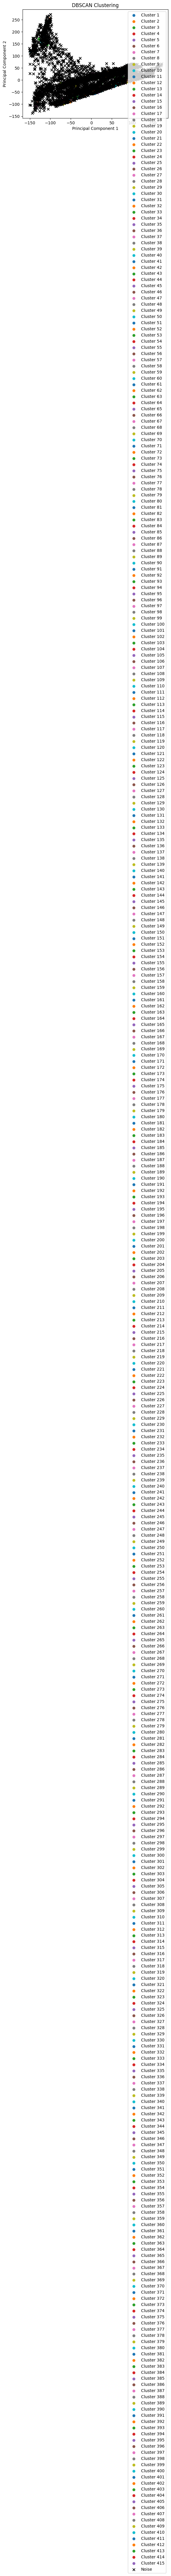

In [ ]:
#version2

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA

UNCLASSIFIED = False
NOISE = None

# Function to calculate Euclidean distance
def _dist(p,q):
    return math.sqrt(np.power(p-q, 2).sum())

# Check if two points are within eps distance
def _eps_neighborhood(p, q, eps):
    return _dist(p, q) < eps

# Find neighbors within eps distance
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for i in range(n_points):
        if _eps_neighborhood(m[:, point_id], m[:, i], eps):
            seeds.append(i)
    return seeds

# Expand a cluster starting from a seed point
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    seeds = _region_query(m, point_id, eps)
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id

        while len(seeds) > 0:
            current_point = seeds[0]
            results = _region_query(m, current_point, eps)
            if len(results) >= min_points:
                for result_point in results:
                    if classifications[result_point] == UNCLASSIFIED or classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True

# DBSCAN clustering function
def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    for point_id in range(n_points):
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id += 1
    return classifications

# Function to plot the clusters after PCA and DBSCAN
def plot_clusters(m, classifications):
    # Convert matrix to numpy array for easier handling
    points = np.array(m)
    n_clusters = max(filter(lambda x: x is not None, classifications)) if classifications else 0

    # Create a scatter plot for each cluster
    for cluster_id in set(classifications):
        if cluster_id == NOISE:
            # Plot noise points in black
            cluster_points = points[:, np.array(classifications) == NOISE]
            plt.scatter(cluster_points[0], cluster_points[1], c='k', marker='x', label='Noise')
        else:
            # Plot cluster points in different colors
            cluster_points = points[:, np.array(classifications) == cluster_id]
            plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_id}')

    # Add labels and legend
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.title('DBSCAN Clustering')
    plt.show()

# PCA + DBSCAN integration function
def test_dbscan_with_pca():
    # Load .mat file
    mat_file_path = '/content/drive/MyDrive/Data Mining /Project/Data/satellite.mat'
    mat_data = loadmat(mat_file_path)
    m = mat_data['X']

    # Ensure m is in the correct shape: (number of features, number of points)
    if m.shape[0] > m.shape[1]:
        m = m.T  # Transpose if necessary to match the shape

    print("Original data shape:", m.shape)

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    transformed_matrix = pca.fit_transform(m.T)  # Transpose for shape (6435, 36)
    transformed_matrix = transformed_matrix.T  # Transpose back to (2, 6435) for DBSCAN

    print("Transformed data shape after PCA:", transformed_matrix.shape)

    # Perform DBSCAN clustering on PCA-reduced data
    eps = 1.0
    min_points = 3
    classifications = dbscan(transformed_matrix, eps, min_points)

    print(f'Cluster assignments: {classifications}')

    # Plot the results
    plot_clusters(transformed_matrix, classifications)

# Run the test with PCA + DBSCAN
test_dbscan_with_pca()

Original data shape: (36, 6435)
Transformed data shape after PCA: (2, 6435)


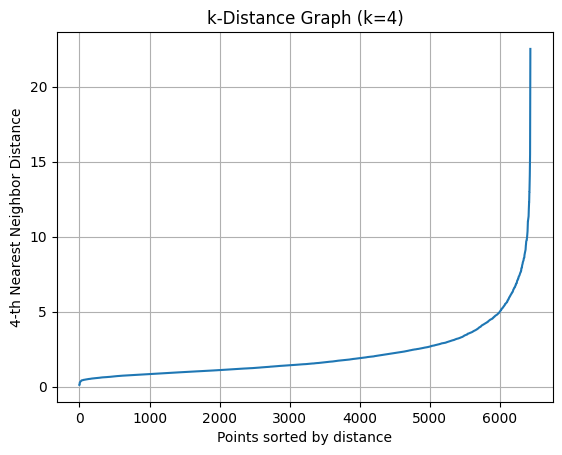

Cluster assignments: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

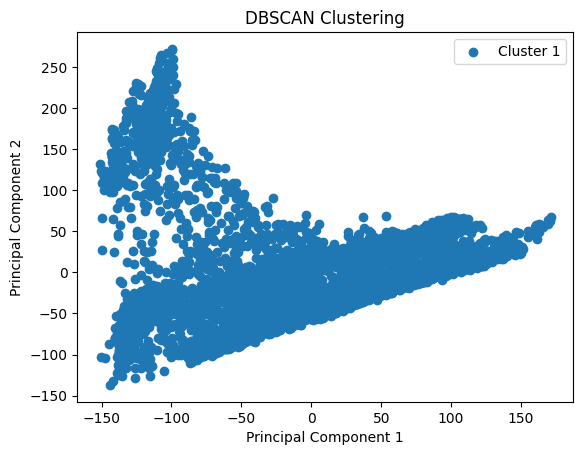

In [ ]:
#version3

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

UNCLASSIFIED = False
NOISE = None

# Function to calculate Euclidean distance
def _dist(p,q):
    return math.sqrt(np.power(p-q, 2).sum())

# Check if two points are within eps distance
def _eps_neighborhood(p, q, eps):
    return _dist(p, q) < eps

# Find neighbors within eps distance
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for i in range(n_points):
        if _eps_neighborhood(m[:, point_id], m[:, i], eps):
            seeds.append(i)
    return seeds

# Expand a cluster starting from a seed point
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    seeds = _region_query(m, point_id, eps)
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id

        while len(seeds) > 0:
            current_point = seeds[0]
            results = _region_query(m, current_point, eps)
            if len(results) >= min_points:
                for result_point in results:
                    if classifications[result_point] == UNCLASSIFIED or classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True

# DBSCAN clustering function
def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    for point_id in range(n_points):
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id += 1
    return classifications

# Function to plot the clusters after PCA and DBSCAN
def plot_clusters(m, classifications):
    # Convert matrix to numpy array for easier handling
    points = np.array(m)
    n_clusters = max(filter(lambda x: x is not None, classifications)) if classifications else 0

    # Create a scatter plot for each cluster
    for cluster_id in set(classifications):
        if cluster_id == NOISE:
            # Plot noise points in black
            cluster_points = points[:, np.array(classifications) == NOISE]
            plt.scatter(cluster_points[0], cluster_points[1], c='k', marker='x', label='Noise')
        else:
            # Plot cluster points in different colors
            cluster_points = points[:, np.array(classifications) == cluster_id]
            plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_id}')

    # Add labels and legend
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.title('DBSCAN Clustering')
    plt.show()

# Function to plot k-distance graph to find optimal eps value
def plot_k_distance(data, k):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(data.T)
    distances, indices = neighbors_fit.kneighbors(data.T)

    # Sort distances for plotting
    distances = np.sort(distances[:, k-1], axis=0)
    plt.plot(distances)
    plt.title(f'k-Distance Graph (k={k})')
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.grid(True)
    plt.show()

# PCA + DBSCAN integration function
def test_dbscan_with_pca():
    # Load .mat file
    mat_file_path = '/content/drive/MyDrive/Data Mining /Project/Data/satellite.mat'
    mat_data = loadmat(mat_file_path)
    m = mat_data['X']

    # Ensure m is in the correct shape: (number of features, number of points)
    if m.shape[0] > m.shape[1]:
        m = m.T  # Transpose if necessary to match the shape

    print("Original data shape:", m.shape)

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    transformed_matrix = pca.fit_transform(m.T)  # Transpose for shape (6435, 36)
    transformed_matrix = transformed_matrix.T  # Transpose back to (2, 6435) for DBSCAN

    print("Transformed data shape after PCA:", transformed_matrix.shape)

    # Plot k-distance graph to help choose eps
    plot_k_distance(transformed_matrix, 4)  # Try with k=4 (min_points)

    # Based on k-distance graph, set optimal eps and min_points values
    eps = 100  # Adjust according to the elbow in the k-distance plot
    min_points = 4  # Set according to data distribution and needs

    # Perform DBSCAN clustering on PCA-reduced data
    classifications = dbscan(transformed_matrix, eps, min_points)

    print(f'Cluster assignments: {classifications}')

    # Plot the results
    plot_clusters(transformed_matrix, classifications)

# Testing with PCA + DBSCAN
test_dbscan_with_pca()

Original data shape: (36, 6435)
Transformed data shape after PCA: (2, 6435)
Cluster assignments: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, None, None, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, None, 2, 2, 2, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 6, 1, 1, 1, 1, None, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, None, None, 2, 2, 2, 2, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

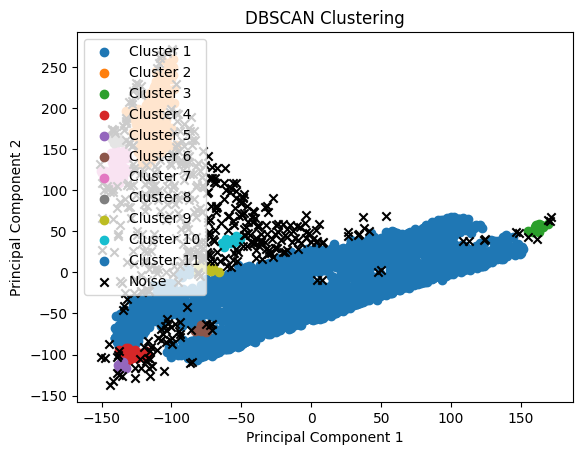

In [ ]:
#version2

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA

UNCLASSIFIED = False
NOISE = None

# Function to calculate Euclidean distance
def _dist(p,q):
    return math.sqrt(np.power(p-q, 2).sum())

# Check if two points are within eps distance
def _eps_neighborhood(p, q, eps):
    return _dist(p, q) < eps

# Find neighbors within eps distance
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for i in range(n_points):
        if _eps_neighborhood(m[:, point_id], m[:, i], eps):
            seeds.append(i)
    return seeds

# Expand a cluster starting from a seed point
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    seeds = _region_query(m, point_id, eps)
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id

        while len(seeds) > 0:
            current_point = seeds[0]
            results = _region_query(m, current_point, eps)
            if len(results) >= min_points:
                for result_point in results:
                    if classifications[result_point] == UNCLASSIFIED or classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True

# DBSCAN clustering function
def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    for point_id in range(n_points):
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id += 1
    return classifications

# Function to plot the clusters after PCA and DBSCAN
def plot_clusters(m, classifications):
    # Convert matrix to numpy array for easier handling
    points = np.array(m)
    n_clusters = max(filter(lambda x: x is not None, classifications)) if classifications else 0

    # Create a scatter plot for each cluster
    for cluster_id in set(classifications):
        if cluster_id == NOISE:
            # Plot noise points in black
            cluster_points = points[:, np.array(classifications) == NOISE]
            plt.scatter(cluster_points[0], cluster_points[1], c='k', marker='x', label='Noise')
        else:
            # Plot cluster points in different colors
            cluster_points = points[:, np.array(classifications) == cluster_id]
            plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_id}')

    # Add labels and legend
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.title('DBSCAN Clustering')
    plt.show()

# PCA + DBSCAN integration function
def test_dbscan_with_pca():
    # Load .mat file
    mat_file_path = '/content/drive/MyDrive/Data Mining /Project/Data/satellite.mat'
    mat_data = loadmat(mat_file_path)
    m = mat_data['X']

    # Ensure m is in the correct shape: (number of features, number of points)
    if m.shape[0] > m.shape[1]:
        m = m.T  # Transpose if necessary to match the shape

    print("Original data shape:", m.shape)

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    transformed_matrix = pca.fit_transform(m.T)  # Transpose for shape (6435, 36)
    transformed_matrix = transformed_matrix.T  # Transpose back to (2, 6435) for DBSCAN

    print("Transformed data shape after PCA:", transformed_matrix.shape)

    # Perform DBSCAN clustering on PCA-reduced data
    eps = 6.0
    min_points = 8
    classifications = dbscan(transformed_matrix, eps, min_points)

    print(f'Cluster assignments: {classifications}')

    # Plot the results
    plot_clusters(transformed_matrix, classifications)

# Run the test with PCA + DBSCAN
test_dbscan_with_pca()

Cluster assignments: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 

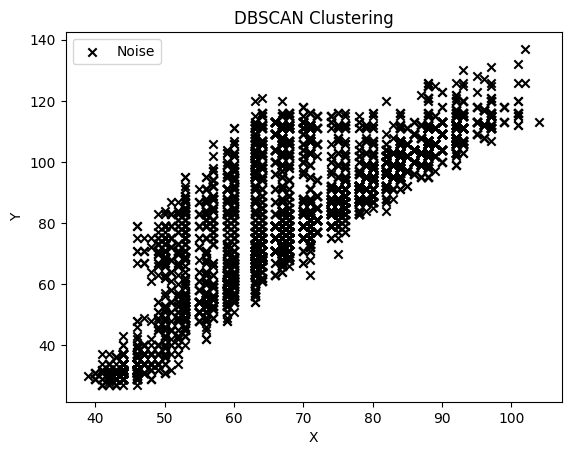

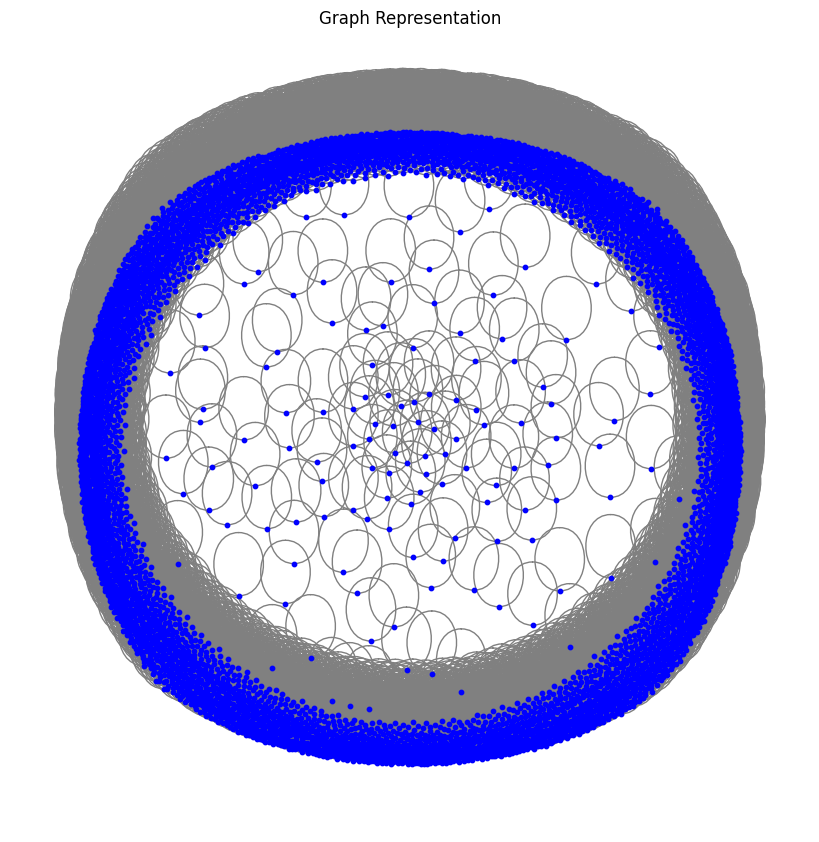

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform
import networkx as nx

UNCLASSIFIED = False
NOISE = None

def _dist(p, q):
    return math.sqrt(np.power(p - q, 2).sum())

def _eps_neighborhood(p, q, eps):
    return _dist(p, q) < eps

def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for i in range(n_points):
        if _eps_neighborhood(m[:, point_id], m[:, i], eps):
            seeds.append(i)
    return seeds

def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    seeds = _region_query(m, point_id, eps)
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id

        while seeds:
            current_point = seeds[0]
            results = _region_query(m, current_point, eps)
            if len(results) >= min_points:
                for result_point in results:
                    if classifications[result_point] == UNCLASSIFIED or classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True

def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    for point_id in range(n_points):
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id += 1
    return classifications

def plot_clusters(m, classifications):
    points = np.array(m)
    for cluster_id in set(classifications):
        if cluster_id == NOISE:
            cluster_points = points[:, np.array(classifications) == NOISE]
            plt.scatter(cluster_points[0], cluster_points[1], c='k', marker='x', label='Noise')
        else:
            cluster_points = points[:, np.array(classifications) == cluster_id]
            plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_id}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('DBSCAN Clustering')
    plt.show()

def plot_graph(distance_matrix, threshold):
    adjacency_matrix = (distance_matrix < threshold).astype(int)
    G = nx.from_numpy_array(adjacency_matrix)

    plt.figure(figsize=(8, 8))
    nx.draw(G, node_size=10, node_color="blue", edge_color="gray", with_labels=False)
    plt.title("Graph Representation")
    plt.show()

def test_dbscan_and_graph_from_mat():
    # Step 1: Load the .mat file
    mat_data = loadmat('/content/drive/MyDrive/Data Mining /Project/Data/satellite.mat')
    data_points = mat_data['X']

    # Step 2: Ensure correct shape of (number of features, number of points)
    if data_points.shape[0] > data_points.shape[1]:
        data_points = data_points.T

    # Step 3: Perform DBSCAN Clustering
    eps = 2  # Adjust as needed
    min_points = 4
    classifications = dbscan(data_points, eps, min_points)
    print(f'Cluster assignments: {classifications}')

    # Plot the clustering result
    plot_clusters(data_points, classifications)

    # Step 4: Create a distance matrix for graph construction
    distance_matrix = squareform(pdist(data_points.T, metric='euclidean'))

    # Step 5: Plot graph based on a threshold
    threshold = 1.0  # Adjust this threshold as needed
    plot_graph(distance_matrix, threshold)

# Run the combined test for DBSCAN and graph plotting
test_dbscan_and_graph_from_mat()

In [ ]:
!pip install numpy==1.24

Original data shape: (6435, 36)


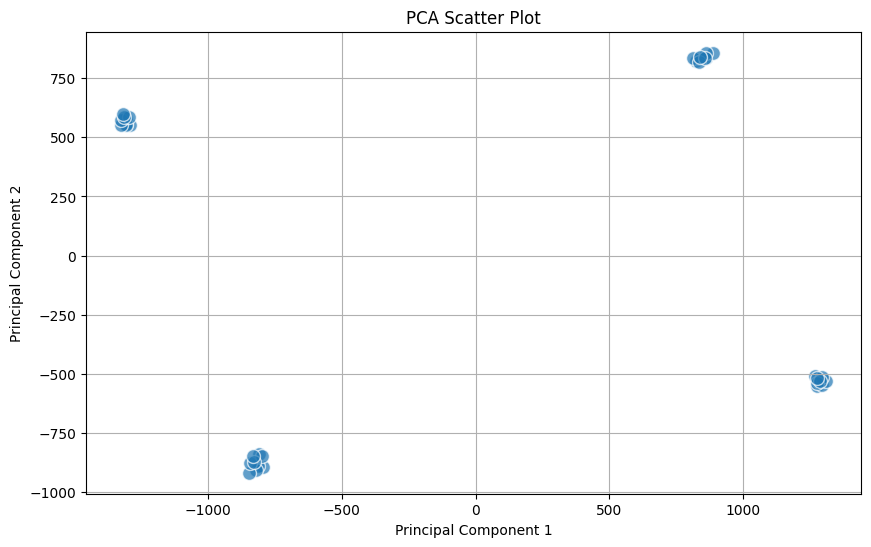

Transformed data shape: (36, 2)


In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Load the .mat file
mat_file_path = '/content/drive/MyDrive/Data Mining /Project/Data/satellite.mat'
mat_contents = scipy.io.loadmat(mat_file_path)

#Matrix data
data = mat_contents['X']

print("Original data shape:", data.shape)  # Should print (36, 6435)

#Applying PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions
transformed_matrix = pca.fit_transform(data.T)  # Transpose to get shape (6435, 36)

#Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(transformed_matrix[:, 0], transformed_matrix[:, 1], alpha=0.7, edgecolors='w', s=100)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')  # X-axis label
plt.ylabel('Principal Component 2')  # Y-axis label
plt.grid()
plt.show()

#Print the shape of the transformed matrix
print("Transformed data shape:", transformed_matrix.shape)  # Should print (36, 2)

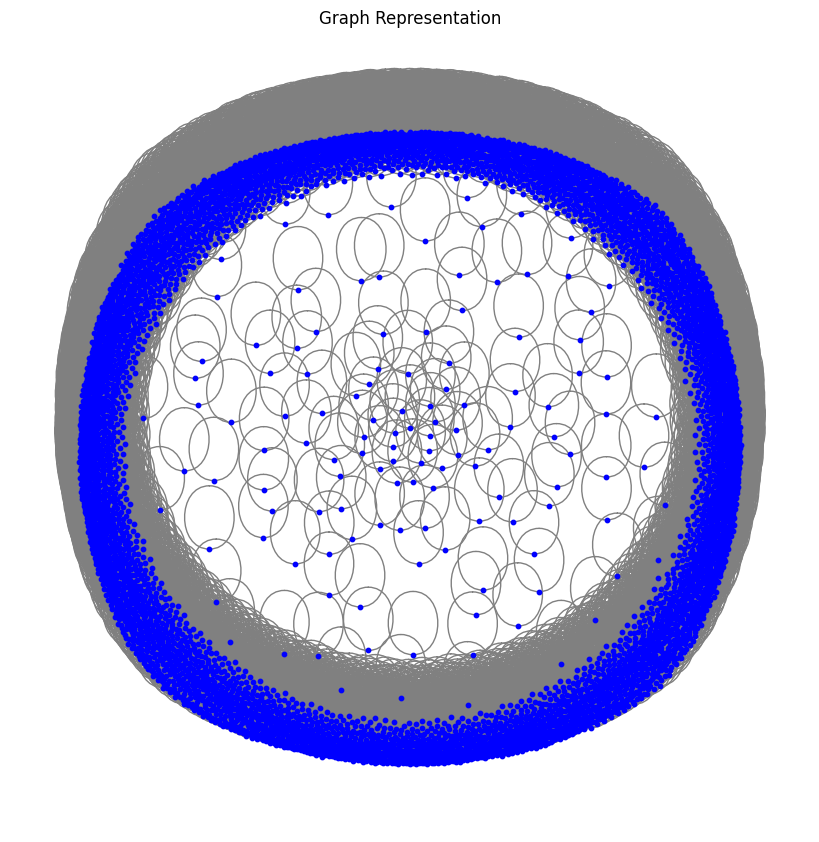

In [1]:
#satellite dataset

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform

# Step 1: Load the .mat file
mat_data = loadmat('/content/drive/MyDrive/Data Mining /Project/Data/satellite.mat')
data_points = mat_data['X']  # Assuming 'X' is the key for your dataset

# Step 2: Compute pairwise distances between the 6435 points based on the 36 features
# pdist computes pairwise distances, squareform converts it into a matrix form
distance_matrix = squareform(pdist(data_points, metric='euclidean'))

# Step 3: Define a threshold for creating edges in the graph
threshold = 1.0  # Adjust this threshold as needed for your data

# Step 4: Create an adjacency matrix where distances below the threshold create edges
adjacency_matrix = (distance_matrix < threshold).astype(int)

# Step 5: Create the graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Step 6: Plot the graph
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=10, node_color="blue", edge_color="gray", with_labels=False)
plt.title("Graph Representation")
plt.show()

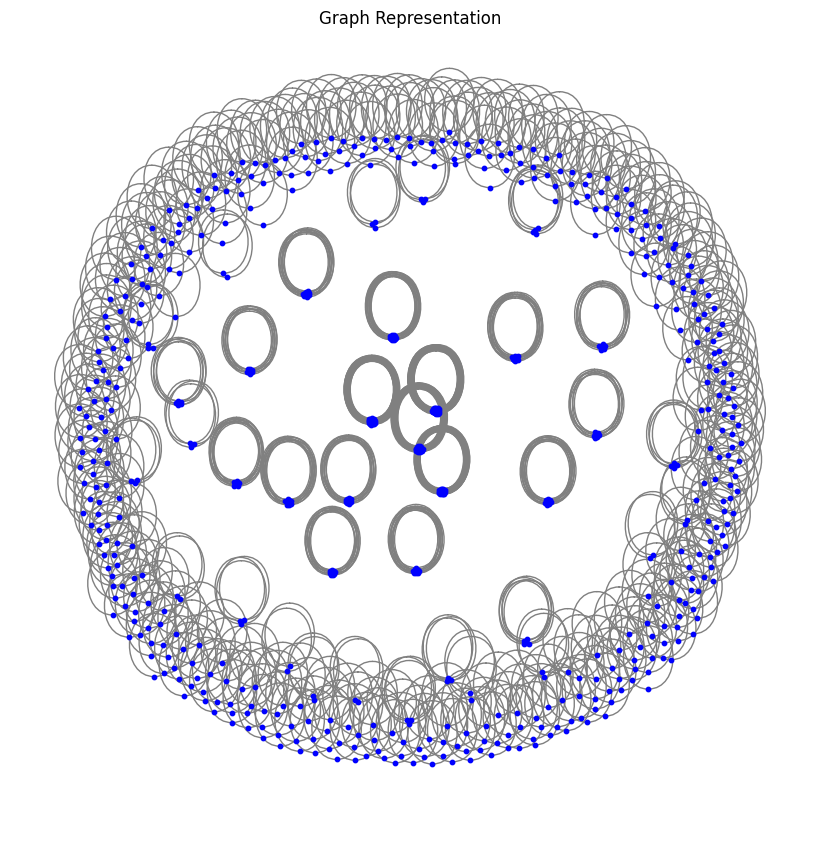

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform

# Step 1: Load the .mat file
mat_data = loadmat('/content/drive/MyDrive/Data Mining /Project/Data/breastw.mat')
data_points = mat_data['X']  # Assuming 'X' is the key for your dataset

# Step 2: Compute pairwise distances between the 6435 points based on the 36 features
# pdist computes pairwise distances, squareform converts it into a matrix form
distance_matrix = squareform(pdist(data_points, metric='euclidean'))

# Step 3: Define a threshold for creating edges in the graph
threshold = 1.0  # Adjust this threshold as needed for your data

# Step 4: Create an adjacency matrix where distances below the threshold create edges
adjacency_matrix = (distance_matrix < threshold).astype(int)

# Step 5: Create the graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Step 6: Plot the graph
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=10, node_color="blue", edge_color="gray", with_labels=False)
plt.title("Graph Representation")
plt.show()

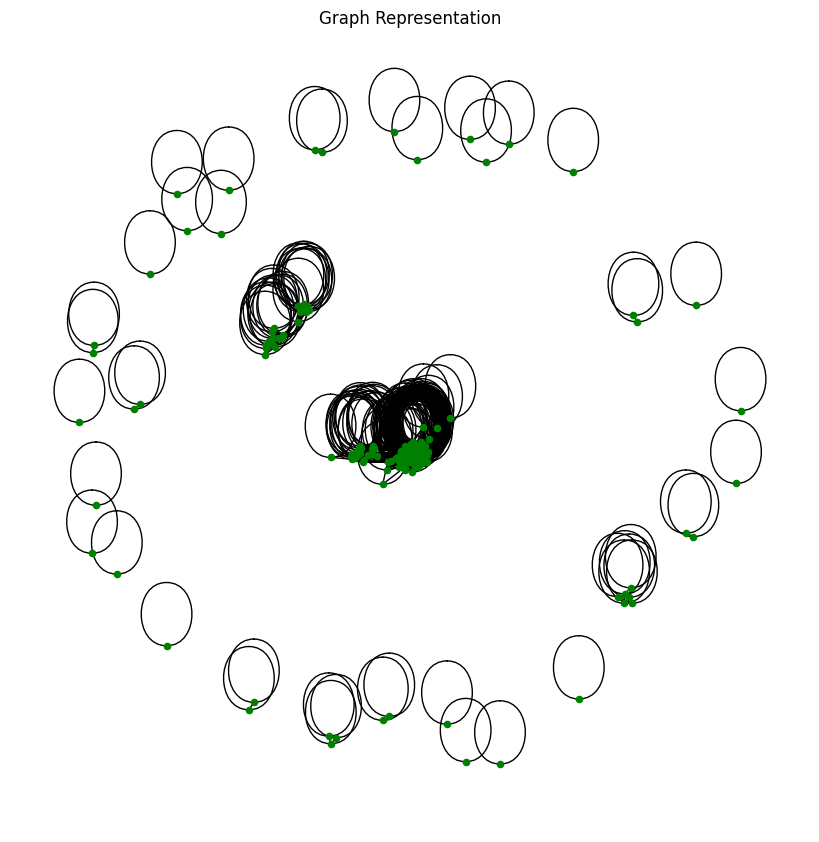

In [1]:
#glass dataset

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform

# Step 1: Load the .mat file
mat_data = loadmat('/content/drive/MyDrive/Data Mining /Project/Data/glass.mat')
data_points = mat_data['X']  # Assuming 'X' is the key for your dataset

# Step 2: Compute pairwise distances between the 6435 points based on the 36 features
# pdist computes pairwise distances, squareform converts it into a matrix form
distance_matrix = squareform(pdist(data_points, metric='euclidean'))

# Step 3: Define a threshold for creating edges in the graph
threshold = 1.0  # Adjust this threshold as needed for your data

# Step 4: Create an adjacency matrix where distances below the threshold create edges
adjacency_matrix = (distance_matrix < threshold).astype(int)

# Step 5: Create the graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Step 6: Plot the graph
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=20, node_color="green", edge_color="black", with_labels=False)
plt.title("Graph Representation")
plt.show()

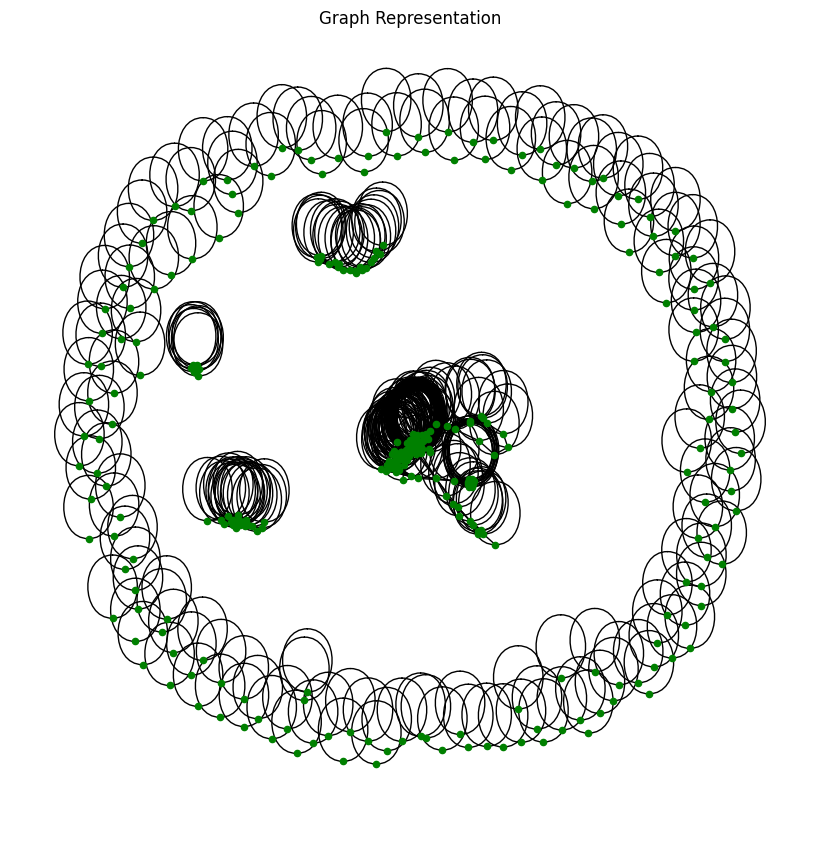

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform

# Step 1: Load the .mat file
mat_data = loadmat('/content/drive/MyDrive/Data Mining /Project/Data/ionosphere.mat')
data_points = mat_data['X']  # Assuming 'X' is the key for your dataset

# Step 2: Compute pairwise distances between the 6435 points based on the 36 features
# pdist computes pairwise distances, squareform converts it into a matrix form
distance_matrix = squareform(pdist(data_points, metric='euclidean'))

# Step 3: Define a threshold for creating edges in the graph
threshold = 1.0  # Adjust this threshold as needed for your data

# Step 4: Create an adjacency matrix where distances below the threshold create edges
adjacency_matrix = (distance_matrix < threshold).astype(int)

# Step 5: Create the graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Step 6: Plot the graph
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=20, node_color="green", edge_color="black", with_labels=False)
plt.title("Graph Representation")
plt.show()